<a href="https://colab.research.google.com/github/Devesh946/AI_df20555/blob/main/Lab3/bank_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDRegressor, BayesianRidge
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import make_scorer
from sklearn.dummy import DummyRegressor, DummyClassifier

In [ ]:
# Load the data from bank-additional-full.csv
df= pd.read_csv("https://raw.githubusercontent.com/albanda/CE888/master/lab3/bank-additional-full.csv",sep=';')
print(df.columns)
df.head

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')


<bound method NDFrame.head of        age          job  marital  ... euribor3m nr.employed    y
0       56    housemaid  married  ...     4.857      5191.0   no
1       57     services  married  ...     4.857      5191.0   no
2       37     services  married  ...     4.857      5191.0   no
3       40       admin.  married  ...     4.857      5191.0   no
4       56     services  married  ...     4.857      5191.0   no
...    ...          ...      ...  ...       ...         ...  ...
41183   73      retired  married  ...     1.028      4963.6  yes
41184   46  blue-collar  married  ...     1.028      4963.6   no
41185   56      retired  married  ...     1.028      4963.6   no
41186   44   technician  married  ...     1.028      4963.6  yes
41187   74      retired  married  ...     1.028      4963.6   no

[41188 rows x 21 columns]>

In [ ]:
#Data preprocessing:
#Use LabelEncoder to convert the label into numbers.
df[["job","marital","education","default","housing","loan","contact","month","day_of_week","poutcome","y"]] = df[["job","marital","education","default","housing","loan","contact","month","day_of_week","poutcome","y"]].apply(LabelEncoder().fit_transform)
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [ ]:
#Perform one-hot encoding on the categorical features using df_dummies = pd.get_dummies(df)
#df_dummies = pd.get_dummies(df)
#df_dummies.head(5)

In [ ]:
# column duration must be deleated
df = df.drop('duration',axis=1)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [ ]:
# Check if there are any missing values in the dataset. If there are, drop the rows.
print("Number of rows before dropping NaNs: %d" % len(df))
df.dropna()
print("Number of rows before dropping NaNs: %d" % len(df))

Number of rows before dropping NaNs: 41188
Number of rows before dropping NaNs: 41188


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


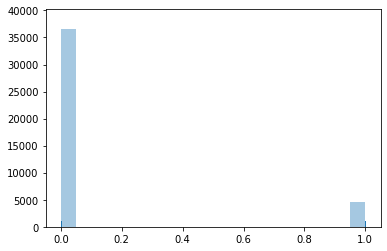

In [ ]:
# Plot histogram of the label and calculate the imbalance in the dataset.
data = df.iloc[:, 19].values #ploted histogram to wether the customers will buy or not
sns.distplot(data, bins=20, kde=False, rug=True) # Histogram

In [ ]:
# features
print(df.columns)
features = ["age", "job", "marital", "education", "default", "housing", "loan",
       "contact", "month", "day_of_week", "campaign", "pdays",
       "previous", "poutcome", "emp.var.rate", "cons.price.idx",
       "cons.conf.idx", "euribor3m", "nr.employed"]
print(df[features].head(5))

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y'],
      dtype='object')
   age  job  marital  ...  cons.conf.idx  euribor3m  nr.employed
0   56    3        1  ...          -36.4      4.857       5191.0
1   57    7        1  ...          -36.4      4.857       5191.0
2   37    7        1  ...          -36.4      4.857       5191.0
3   40    0        1  ...          -36.4      4.857       5191.0
4   56    7        1  ...          -36.4      4.857       5191.0

[5 rows x 19 columns]


In [ ]:
# Outcomes
print(df.columns)
outcomes = ["y"]
print(df[outcomes].head())

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y'],
      dtype='object')
   y
0  0
1  0
2  0
3  0
4  0


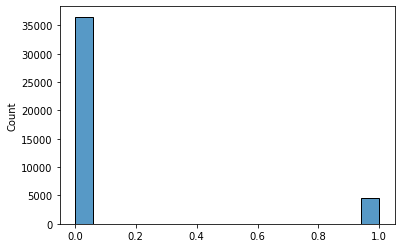

In [ ]:
X_df = df[features].copy()
y_df = df[outcomes].copy()
X = X_df.values
y = y_df.values.T[0]
y = (y - y.min())/(y.max() - y.min()) 
sns_plot = sns.histplot(y, kde=False) #histogram by different method

In [ ]:
clf = DecisionTreeRegressor()
clf.fit(X, y)
print("MSE of the model = %1.4g" % mse(y, clf.predict(X)))

MSE of the model = 0.003155


In [ ]:
n_test = 8238
n_repeat = 50

estimator = DecisionTreeRegressor()
#estimator = RandomForestRegressor()

# Compute predictions
y_predicts = np.ones((n_repeat, len(X))) * np.nan

for i in range(n_repeat):
    sample  = np.random.choice(range(len(X)), replace=True, size=len(X))  # bootstrap!
    train_ids = sample[:-n_test]
    test_ids  = sample[-n_test:]
    test_ids = np.setdiff1d(test_ids, train_ids)  # only use those that weren't in the training set for testing
    if len(test_ids) == 0:
        continue
    X_train, y_train = X[train_ids], y[train_ids]
    X_test, y_test = X[test_ids], y[test_ids]
    
    estimator.fit(X_train, y_train)
    y_predict = estimator.predict(X_test)
    y_predicts[i, test_ids] = y_predict
    #sample  = np.random.choice(range(len(X)), replace=True, size=len(X))  # bootstrap!
    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=len(X))
    #estimator.fit(X_train, y_train)
    #y_predicts = estimator.predict(X_test)

In [ ]:
X_test

array([[ 5.7000e+01,  7.0000e+00,  1.0000e+00, ..., -3.6400e+01,
         4.8570e+00,  5.1910e+03],
       [ 5.7000e+01,  3.0000e+00,  0.0000e+00, ..., -3.6400e+01,
         4.8570e+00,  5.1910e+03],
       [ 3.9000e+01,  4.0000e+00,  2.0000e+00, ..., -3.6400e+01,
         4.8570e+00,  5.1910e+03],
       ...,
       [ 6.2000e+01,  5.0000e+00,  1.0000e+00, ..., -5.0800e+01,
         1.0310e+00,  4.9636e+03],
       [ 3.8000e+01,  3.0000e+00,  0.0000e+00, ..., -5.0800e+01,
         1.0310e+00,  4.9636e+03],
       [ 7.3000e+01,  5.0000e+00,  1.0000e+00, ..., -5.0800e+01,
         1.0280e+00,  4.9636e+03]])

In [ ]:
y_predicts

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ...,  0., nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ...,  0., nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan,  0., nan, ..., nan, nan, nan]])

In [ ]:
y_bias = (y - np.nanmean(y_predicts, axis=0)) **2
y_error = np.nanmean((y - y_predicts) **2, axis=0)#.mean()
y_var = np.nanvar(y_predicts, axis=0, ddof = 1)

print(np.nanmean(y_bias) +  np.nanmean(y_var))

clf_type = "Decision tree"
print("{0}: {1:.4f} (error) = {2:.4f} (bias^2) "
          "+ {3:.4f} (var)".format(clf_type, np.nanmean(y_error), np.nanmean(y_bias), np.nanmean(y_var)))

print("{0}: {1:.4f} ((bias^2) + (var)) = {2:.4f} (bias^2) "
          "+ {3:.4f} (var)".format(clf_type, np.mean(y_bias) + np.mean(y_var), np.mean(y_bias), np.mean(y_var)))

0.18834071117667642
Decision tree: 0.1629 (error) = 0.1088 (bias^2) + 0.0796 (var)
Decision tree: nan ((bias^2) + (var)) = nan (bias^2) + nan (var)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: Degrees of freedom <= 0 for slice.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
clf = RandomForestRegressor(n_estimators=1000,max_depth=3)
#clf = BayesianRidge(normalize=True)
scores = cross_val_score(clf, X, y, cv=10, scoring = make_scorer(mse))

dummy_clf = DummyRegressor(strategy='mean')
dummy_scores = cross_val_score(dummy_clf, X, y, cv=10, scoring = make_scorer(mse))

print("MSE: %0.8f +/- %0.8f" % (scores.mean(), scores.std()))
print("Dummy MSE: %0.8f +/- %0.8f" % (dummy_scores.mean(), dummy_scores.std()))

MSE: 0.08597510 +/- 0.06543884
Dummy MSE: 0.10345690 +/- 0.10218101


In [ ]:
clf = RandomForestClassifier(n_estimators=100, max_depth=3)
scores = cross_val_score(clf, X, y, cv=10, scoring=make_scorer(acc))  # cross-validation
print("ACC: %.2f +/- %.2f" % (scores.mean(), scores.std()))
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
print(indices)

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, features[indices[f]],  importances[indices[f]]))

# Plot the feature importances of the forest
fig = plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), np.array(features)[indices])
plt.xlim([-1, X.shape[1]])
plt.ylim([0, None])

fig.set_size_inches(15, 8)

# plt.savefig("importances.pdf", bbox_inches='tight')

ACC: 0.77 +/- 0.23


NotFittedError: ignored